# Example of usage of stock forecaster

----------------------

## Getting started

Importing the necessary libraries.

In [1]:
import os
import datetime

import matplotlib.pyplot as plt

from djia_stock_prediction import Dataset
from djia_stock_prediction import TradingDaysHelper

from djia_stock_prediction import str_to_datetime

from djia_stock_prediction import StockForecasterModel
from djia_stock_prediction import LinearRegressionStockForecaster
from djia_stock_prediction import ArimaStockForecaster
from djia_stock_prediction import ProphetStockForecaster
from djia_stock_prediction import LongShortTermMemoryStockForecaster

/usr/local/lib/python3.5/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)
Using TensorFlow backend.


### Creating a dataset

Creating and saving the dataset.

In [2]:
# Loading the oldest available dataset
ds = Dataset.loadDatasetFromFile(os.path.join('data', 'djia_20140324-20190322.pkl'))
# Updating the dataset with the most recent data available at the moment
ds.updateData()
# Saving the dataset
ds.saveDataToFile(os.path.join('example', 'djia_dataset.pkl'))

'example/djia_dataset.pkl'

----------------------

## 1. Prediction of closing prices for the trading days in a date range in the future

## Retrieving the dataset

In [3]:
# Loading the prevously saved dataset
ds = Dataset.loadDatasetFromFile(os.path.join('example', 'djia_dataset.pkl'))

Optionally update the dataset

In [4]:
# Updating the dataset ...
ds.updateData()
# ... and saving it with the most recent data
ds.saveDataToFile(os.path.join('example', 'djia_dataset.pkl'))

'example/djia_dataset.pkl'

## Creating and training ML models

Getting the end date of the training set as the current date.

In [5]:
training_end = datetime.datetime.today()

Creating and training a Linear Regresion model.

In [6]:
linear_regresion_model = LinearRegressionStockForecaster('AAPL')
linear_regresion_model.train(ds, end_date=training_end)
linear_regresion_model_file = linear_regresion_model.saveToFile(
    os.path.join('example', 'AAPL_LinearRegression.pkl'))

Creating and training an ARIMA model.

In [7]:
arima_model = ArimaStockForecaster('AAPL')
arima_model.train(ds, end_date=training_end)
arima_model_file = arima_model.saveToFile(os.path.join('example', 'AAPL_ARIMA.pkl'))

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5541.431, BIC=5567.094, Fit time=7.452 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=6327.930, BIC=6338.195, Fit time=0.135 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=6020.518, BIC=6041.048, Fit time=1.692 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5541.016, BIC=5561.546, Fit time=7.035 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=5542.623, BIC=5568.285, Fit time=9.017 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=6329.824, BIC=6345.221, Fit time=0.417 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=5542.588, BIC=5568.251, Fit time=28.863 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=5543.329, BIC=5574.124, Fit time=38.794 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=5539.254, BIC=5554.651, Fit time=4.969 seconds
Fit ARIMA: order=(0, 1, 0)

Creating and training a Prophet model.

In [8]:
prophet_model = ProphetStockForecaster('AAPL')
prophet_model.train(ds, end_date=training_end)
prophet_model_file = prophet_model.saveToFile(os.path.join('example', 'AAPL_Prophet.pkl'))

/usr/local/lib/python3.5/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()


Creating and training a LSTM (Long Short-Term Memory) model.

In [9]:
lstm_model = LongShortTermMemoryStockForecaster('AAPL')
lstm_model.train(ds, end_date=training_end)
lstm_model_file = lstm_model.saveToFile(os.path.join('example', 'AAPL_LSTM.pkl'))

Epoch 1/2
 - 304s - loss: 0.0019
Epoch 2/2
 - 303s - loss: 8.2510e-04


## Performing predictions

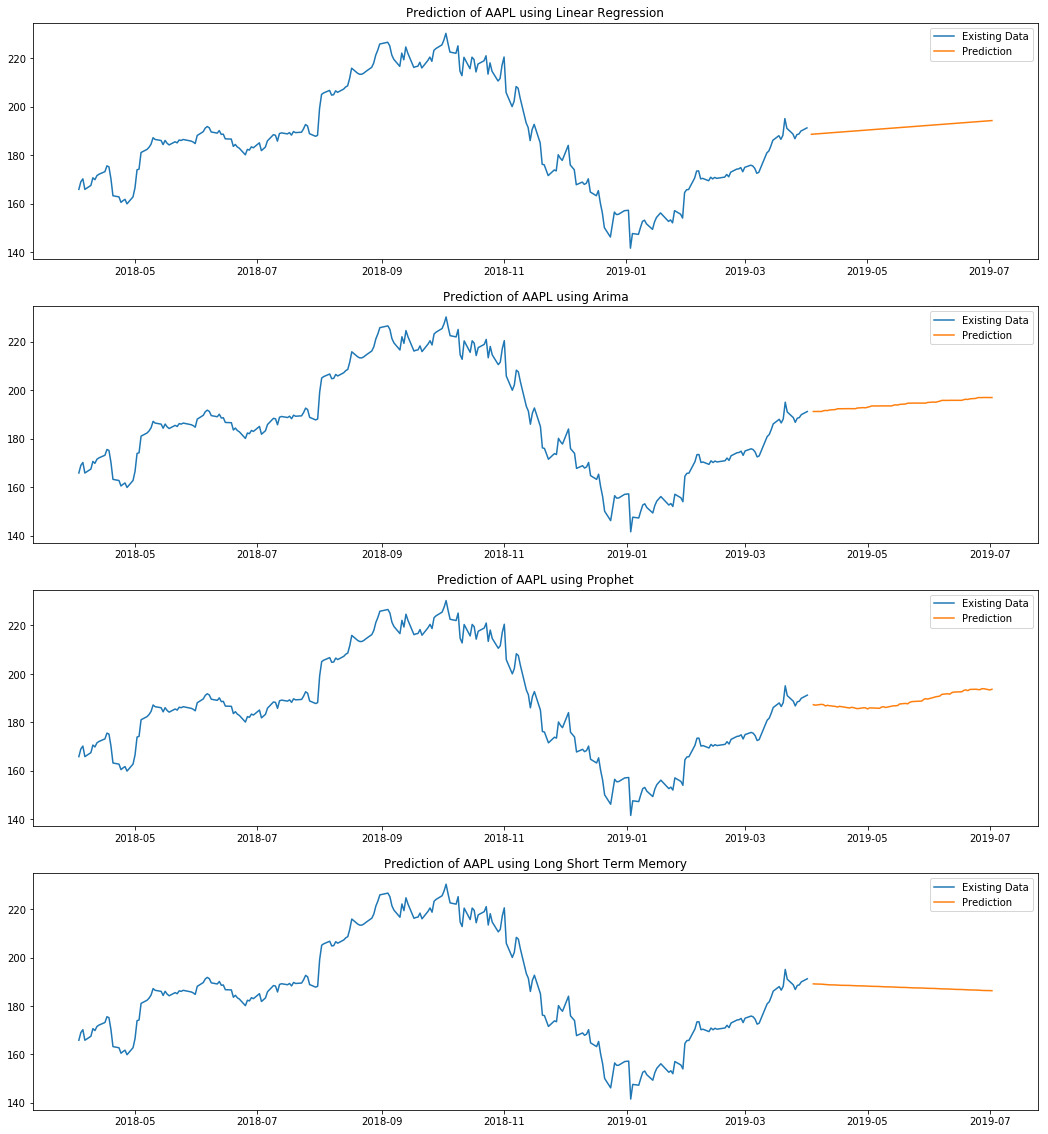

In [13]:
prediction_start = datetime.datetime.today() + datetime.timedelta(days=1)
prediction_end = prediction_start + datetime.timedelta(days=90)


fig = plt.figure(figsize=(18, 20))

# Retreived the previously saved and traing models
models = []
models.append(StockForecasterModel.loadFromFile(os.path.join('example', 'AAPL_LinearRegression.pkl')))
models.append(StockForecasterModel.loadFromFile(os.path.join('example', 'AAPL_ARIMA.pkl')))
models.append(StockForecasterModel.loadFromFile(os.path.join('example', 'AAPL_Prophet.pkl')))
models.append(StockForecasterModel.loadFromFile(os.path.join('example', 'AAPL_LSTM.pkl')))


# Existing data from one year ago to plot the comparison with the predicted prices
existing_df = ds.getDataframe(ticker_symbol='AAPL', 
                              from_date=datetime.datetime.today() - datetime.timedelta(days=365));

n_rows = len(models)
i = 1
for model in models:
    ax = fig.add_subplot(n_rows, 1, i)
    i = i + 1

    # Getting the predicted values for the current model
    preds = model.predict(prediction_start, to_date=prediction_end)

    # Ploting the graph to compare the predicted closing prices against the ones in the validation set
    ax.plot(existing_df.date, existing_df.close, label='Existing Data')
    ax.plot(preds.date, preds.predicted_price, label='Prediction')
    ax.set_title('Prediction of AAPL using ' + model.long_name)
    ax.legend()

# Saving the plot with graphs comparing predictions against validation closing prices
plt.savefig(os.path.join('figures', 'prediction_example.png'))
plt.show()

----------------------

## 2. Prediction based on daily updating the dataset and predicting next day closing price

i) For one particular day creating, training and saving an LSTM model.

In [14]:
training_end = datetime.datetime.today()

daily_lstm_model = LongShortTermMemoryStockForecaster('AAPL')
daily_lstm_model.train(ds, end_date=training_end)
daily_lstm_model_file = daily_lstm_model.saveToFile(os.path.join('example', 'AAPL_daily_LSTM.pkl'))

Epoch 1/2
 - 303s - loss: 0.0027
Epoch 2/2
 - 302s - loss: 0.0011


ii) Then for the subsequent days.

Updating the dataset.

In [15]:
# Loading the prevously saved dataset
ds = Dataset.loadDatasetFromFile(os.path.join('example', 'djia_dataset.pkl'))

# If necessary
# Updating the dataset ...
ds.updateData()
# ... and saving it with the most recent data
ds.saveDataToFile(os.path.join('example', 'djia_dataset.pkl'))

'example/djia_dataset.pkl'

Performing the prediction for the next trading day.

In [16]:
# Loading the trained LSTM model
lstm_model = StockForecasterModel.loadFromFile(daily_lstm_model_file)

# Calculating the next trading day
next_date = datetime.datetime.today().replace(minute=0, hour=0, second=0, microsecond=0);

# Predicting the closing price for the next trading day
next_pred = lstm_model.predict(next_date, base_dataset=ds)

print(next_pred)

        date  predicted_price symbol
0 2019-04-02       189.948593   AAPL


----------------------

In [20]:
!!jupyter nbconvert StockPricePredictor_example.ipynb

['[NbConvertApp] Converting notebook StockPricePredictor_example.ipynb to html',
 '[NbConvertApp] Writing 476046 bytes to StockPricePredictor_example.html']